### Problema retirado desse site : https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
### Baseado na plataforma https://datacamp.com

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
colunas = ['buying',
'maint',
'doors',
'persons',
'lug_boot',
'safety',
'y']

In [4]:
data = pd.read_csv('car.csv', names=colunas)

In [8]:
data[ data['y'] == 'vgood' ]['buying'].value_counts()

low    39
med    26
Name: buying, dtype: int64

In [10]:
data[ data['y'] == 'vgood' ]['doors'].value_counts()

4        20
5more    20
3        15
2        10
Name: doors, dtype: int64

In [11]:
data[ data['y'] == 'vgood' ]['safety'].value_counts()

high    65
Name: safety, dtype: int64

In [32]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,y
0,3,3,0,0,0,0,unacc
1,3,3,0,0,0,1,unacc
2,3,3,0,0,0,2,unacc
3,3,3,0,0,1,0,unacc
4,3,3,0,0,1,1,unacc


In [33]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
y           0
dtype: int64

In [34]:
y_mapping = {'unacc': 0, 'acc': 1, 'good':2, 'vgood':3}
data['y'] = data['y'].map(y_mapping)

In [21]:
y = data['y']
data = data.drop('y', axis=1) 
X = data.values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

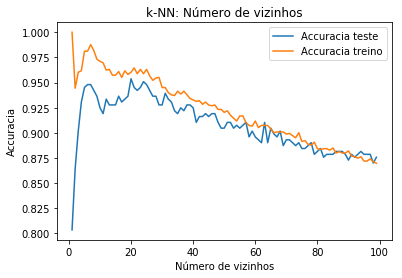

In [37]:
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# gerando o grafico
plt.title('k-NN: Número de vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Accuracia teste')
plt.plot(neighbors, train_accuracy, label = 'Accuracia treino')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Accuracia')
plt.show()

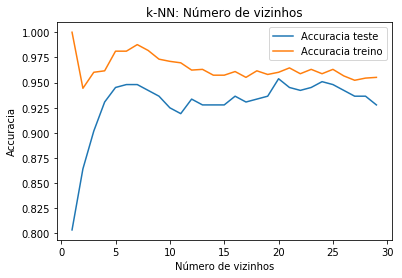

In [38]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# gerando o grafico
plt.title('k-NN: Número de vizinhos')
plt.plot(neighbors, test_accuracy, label = 'Accuracia teste')
plt.plot(neighbors, train_accuracy, label = 'Accuracia treino')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Accuracia')
plt.show()